# Practica 2 (Regresión logística)
### Aprendizaje automático y big data
##### _Alberto García Doménech - Pablo Daurell Marina_    
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def carga_csv(file_name):
    """carga el fichero csv especificado y lo
 devuelve en un array de numpy
    """
    valores = pd.read_csv(file_name, header=None).values
    # suponemos que siempre trabajaremos con float
    return valores.astype(float)

## Parte 1 (Regresión logística)

### Visualización:   
Cargamos los datos que vamos a tratar de clasificar mediante regresión logística:    
_(Notas de candidatos a examenes de admisión a una universidad y si fueron admitidos o no)_

In [3]:
data = carga_csv('ex2data1.csv')

X = data[:, :-1]
np.shape(X) # (100, 2)

Y = data[:, -1]
np.shape(Y) # (100,)

m = np.shape(X)[0]
n = np.shape(X)[1]

# añadimos una columna de 1's a la X
X = np.hstack([np.ones([m, 1]), X])

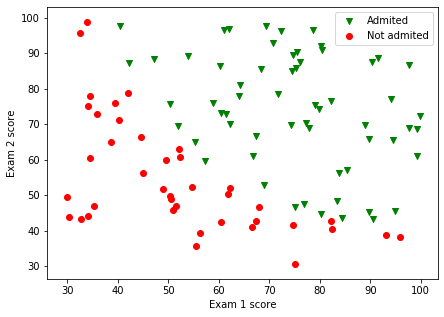

In [4]:
plt.figure(figsize=(7,5))

pos = np.where(Y == 1)
plt.scatter(X[pos, 1], X[pos, 2], marker='v', c='g', label='Admited')

pos = np.where(Y == 0)
plt.scatter(X[pos, 1], X[pos, 2], marker='o', c='r', label='Not admited')

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc = 'upper right')
plt.show()

### Optimización:
Vamos a definir la función utilizar el método de descenso del gradiente para minimizar el error de la hipótesis que generemos con la regresión logística. Para ello utilizaremos la función ```cost``` para calcular el coste, la función ```gradient``` para llevar a cabo el descenso del gradiente y la función ```sigmoid``` para calcular la hipótesis de la regresión logística.

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def cost(Theta, X, Y):
    H = sigmoid(np.matmul(X, Theta))
    cost = (-1 / len(X)) * ( np.matmul(np.log(H).T, Y) + np.matmul(np.log(1-H).T, (1-Y)))
    return cost

def gradient(Theta, X, Y):
    H = sigmoid(np.matmul(X, Theta))
    return ( (1/len(X)) * np.matmul(X.T, H - Y) )

In [6]:
Theta = np.zeros(np.shape(X[1]))

In [7]:
print(cost(Theta,X,Y))
print(gradient(Theta, X, Y))

0.6931471805599452
[ -0.1        -12.00921659 -11.26284221]


Calculamos el valor óptimo de Theta que minimice la función de coste usando la función ```fmin_tnc``` de la librería _scipy.optimize_:

In [8]:
import scipy.optimize as opt

result = opt.fmin_tnc(func=cost, x0=Theta, fprime=gradient, args=(X, Y))
theta_opt = result[0]

theta_opt

array([-25.16131863,   0.20623159,   0.20147149])

### Clasificación:
Una vez calculados los valores de Theta que minimizan el coste del modelo, pintamos la recta resultante para ver como quedan separados los datos de nuestro conjunto de datos.

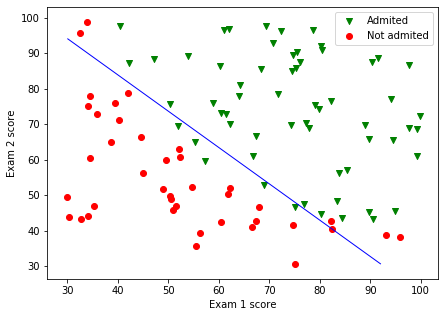

In [9]:
def pinta_frontera_recta(theta, X, Y):
    plt.figure(figsize=(7,5))
    
    pos = np.where(Y == 1)
    plt.scatter(X[pos, 1], X[pos, 2], marker='v', c='g', label='Admited')
    
    pos = np.where(Y == 0)
    plt.scatter(X[pos,1], X[pos,2], marker='o', c='r', label='Not admited')

    x1_min, x1_max = X[:, 1].min(), X[:, 1].max()
    x2_min, x2_max = X[:, 2].min(), X[:, 2].max()

    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max),
    np.linspace(x2_min, x2_max))

    h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0], 1)), xx1.ravel(), xx2.ravel()].dot(theta))

    h = h.reshape(xx1.shape)
    
    plt.legend(loc = 'upper right')
    plt.xlabel("Exam 1 score")
    plt.ylabel("Exam 2 score")
    
    # el cuarto parámetro es el valor de z cuya frontera se quiere pinta
    plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='blue')
    plt.savefig("frontera.pdf")
    plt.show()
    plt.close()

# Pintamos la frontera
pinta_frontera_recta(theta_opt, X, Y)

> En efecto vemos como, al obtener los valores óptimos para Theta, tenemos una recta que divide nuestro conjunto de datos bastante bien. Vemos como la mayoría de admitidos están encima de la recta y la mayoría de los no admitidos estánn por debajo.

Vamos a evaluar como de buena es la clasificación que hace nuestro modelo calculando algunas métricas como la exactidud, la precisión y la exhaustividad.

In [10]:
def metrics(X, Y, theta_opt):
    h = sigmoid(np.dot(X, theta_opt)) # Predecimos los valores con la Theta entrenada por nuestro modelo

    h[h >= 0.5] = 1 # Admitidos
    h[h < 0.5] = 0  # No admitidos

    tp = h[(h == Y) & (h == 1)].size # Verdaderos positivos
    tn = h[(h == Y) & (h == 0)].size # Verdaderos negativos
    fp = h[(h != Y) & (h == 1)].size # Falsos positivos
    fn = h[(h != Y) & (h == 0)].size # Falsos negativos
    
    accuracy = (tp + tn) / (tp + tn + fp + fn) # Exactitud (Proporción de predicciones correctas)
    precission = tp / (tp + fp) # Precision (Proporción de predicciones positivas correctas)
    recall = tp / (tp + fn) # Exhaustividad (Proporción de casos positivos predichos correctamente)
    
    # Mostramos una matriz de confusión
    print('Confussion matrix')
    print('TP:', tp, 'FN:', fn)
    print('FP:', fp, 'TN:', tn)
    
    # Mostramos las métricas
    print('\nMetrics')
    print('Accuracy: ', accuracy)
    print('Precission: ', precission)
    print('Recall: ', recall)

metrics(X, Y, theta_opt)

Confussion matrix
TP: 55 FN: 5
FP: 6 TN: 34

Metrics
Accuracy:  0.89
Precission:  0.9016393442622951
Recall:  0.9166666666666666


> Al comprobar los resultados de nuestra clasificación con el conjunto de datos real, vemos que:
- 55 de las personas que hemos estimado que son admitidas realmente lo son, y 6 de ellas no.
- 34 de las personas que hemos estimado que no son admitidas realmente sí lo han sido, y 5 de ellas no.
- Exactitud: 89% -> El 89% de nuestras prediciones han sido correctas.
- Precisión: 90% -> El 90% de admitidos que hemos clasificado son correctos.
- Exhaustividad: 92% -> De todos los admitidos, hemos clasificado correctamente al 92%.

## Parte 2 (Regresión logística regularizada)

### Visualización:
Cargamos los datos que vamos a tratar de clasificar mediante regresión logística, esta vez usando regularización ya que este conjunto de datos no se podrán separar linealmente:    
_(Resultados de dos tests a varios microchips y si pasarán el control de calidad o no)_

In [11]:
data = carga_csv('ex2data2.csv')

X = data[:, :-1]
np.shape(X) # (118, 2)

Y = data[:, -1]
np.shape(Y) # (118,)

m = np.shape(X)[0]
n = np.shape(X)[1]

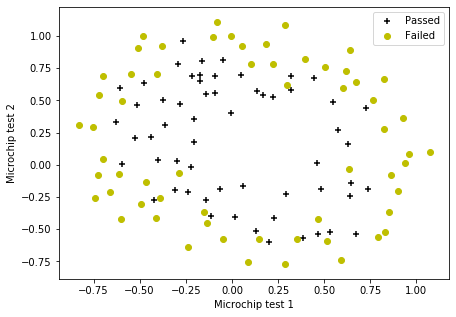

In [12]:
plt.figure(figsize=(7,5))

pos = np.where(Y == 1)
plt.scatter(X[pos, 0], X[pos, 1], marker='+', c='k', label='Passed')

pos = np.where(Y == 0)
plt.scatter(X[pos, 0], X[pos, 1], marker='o', c='y', label='Failed')

plt.xlabel('Microchip test 1')
plt.ylabel('Microchip test 2')
plt.legend()
plt.show()

### Polinomización:
Para entrenar mejor a nuestro modelo vamos a extender nuestros datos de entrenamiento con términos polinómicos hasta la sexta potencia:

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=6)
X_poly = poly.fit_transform(X)

### Optimización: 
Volvemos a utilizar el descenso del gradiente para encontrar los valores óptimos de Theta que minimicen la función de coste.      

En este caso hemos polinomizado los datos de entrenamiento y tenemos muchos atributos en cada ejemplo de entrenamiento, debido a esto podría producirse un sobreaprendizaje que vamos a intentar evitar usando un parámetro _Lambda_ para regularizar los resultados.  

In [14]:
def cost(Theta, X, Y, Lambda):
    H = sigmoid(np.matmul(X, Theta))
    aux = (-1 / len(X)) * ( np.matmul(np.log(H).T, Y) + np.matmul(np.log(1-H).T, (1-Y)))
    regul = (Lambda/(2*len(X))) * np.sum(Theta**2)
    return (aux + regul)

def gradient(Theta, X, Y, Lambda):
    H = sigmoid(np.matmul(X, Theta))
    aux = np.matmul(X.T, H - Y) / len(X)
    regul = (Lambda/len(X)) * Theta
    return (aux + regul)

In [15]:
Theta = np.zeros(np.shape(X_poly[1]))
Lambda = 1

In [16]:
print(cost(Theta, X_poly, Y, Lambda))

0.6931471805599453


Calculamos el valor óptimo de Theta con ```fmin_tnc```

In [17]:
result = opt.fmin_tnc(func=cost, x0=Theta, fprime=gradient, args=(X_poly, Y, Lambda))
theta_opt = result[0]
theta_opt

array([ 1.14201564,  0.60123715,  1.16715812, -1.87180902, -0.91567128,
       -1.26944016,  0.12678673, -0.36850106, -0.34494251, -0.17391075,
       -1.4237067 , -0.04838578, -0.60631732, -0.26916588, -1.16320191,
       -0.24269705, -0.20697486, -0.04305267, -0.28008545, -0.28708931,
       -0.46912456, -1.03629766,  0.0290438 , -0.29250729,  0.01716376,
       -0.32880516, -0.13795624, -0.93187565])

### Clasificación:
Representamos la frontera resultante de entrenar nuestro modelo:

In [18]:
def plot_decisionboundary(X, Y, theta, poly, Lambda):
    plt.figure(figsize=(7,5))
    plt.title('Lambda = {}'.format(Lambda))
    
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    
    h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(theta))
    h = h.reshape(xx1.shape)
    
    plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='g')
    
    pos = np.where(Y == 1)
    plt.scatter(X[pos, 0], X[pos, 1], marker='+', c='k', label='Passed')

    pos = np.where(Y == 0)
    plt.scatter(X[pos, 0], X[pos, 1], marker='o', c='y', label='Failed')
    
    plt.xlabel('Microchip test 1')
    plt.ylabel('Microchip test 2')
    plt.legend()
    plt.show()

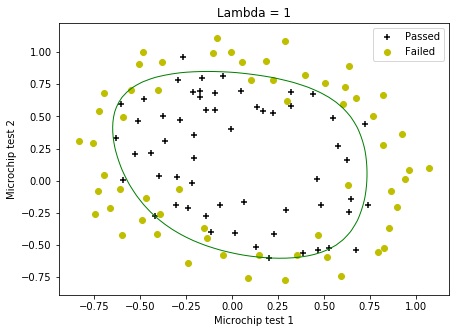

In [19]:
plot_decisionboundary(X, Y, theta_opt, poly, Lambda)

> Vemos como obtenemos una especie de elipse que separa bastante bien el conjunto de datos, con los microchips fallidos fuera de la elipse y los aceptados dentro de ella.

- Vamos a comprobar cómo varía la frontera resultante si variamos el parámetro de regularización: 

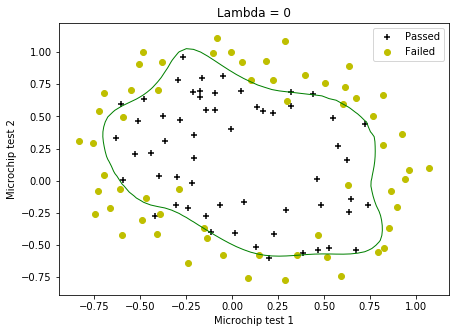

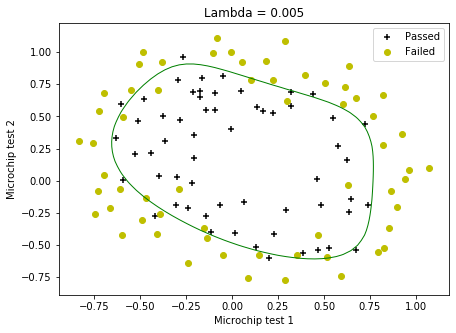

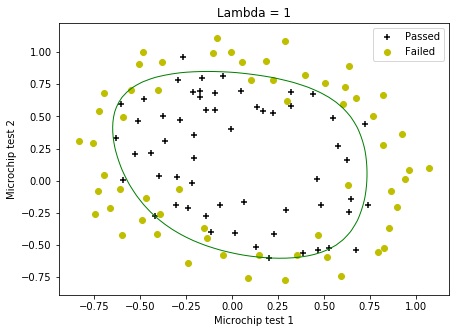

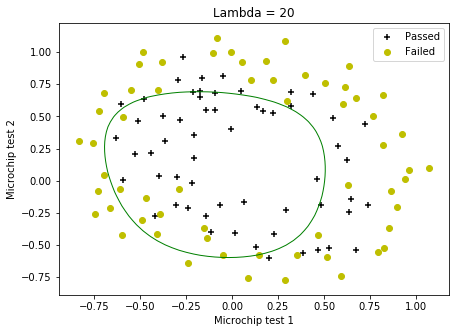

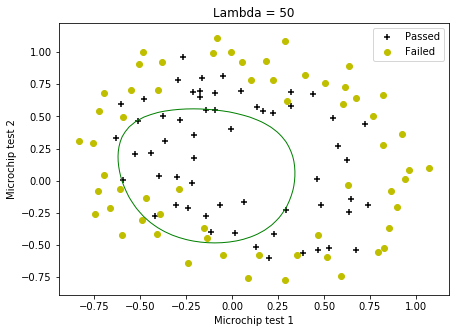

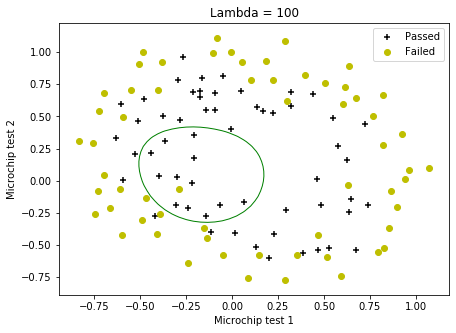

In [20]:
for Lambda in [0, 0.005, 1, 20, 50, 100]:
    Theta = np.zeros(np.shape(X_poly[1]))
    result = opt.fmin_tnc(func=cost, x0=Theta, fprime=gradient, args=(X_poly, Y, Lambda))
    theta_opt = result[0]
    plot_decisionboundary(X, Y, theta_opt, poly, Lambda)

> Podemos con obsevar que con lambda igual a 0, es decir sin regularizar los resultados, obtenemos una frontera que separa casi a la perfección los datos, el problema es que esto puede suponer que el modelo sobreaprenda demasiado y no sea capaz de predecir bien nuevos valores fuera del conjunto de entrenamiento.    
Al aumentar lambda (lambda = 1) tenemos una frontera algo más similar a una elipse que no se adapta tan bien a los datos, pero seguramente clasifique mejor a nuevos individuos.   
Sin embargo si continuámos aumentando lambda empezamos a ver como la frontera se reduce demasiado y ya no separa bien al conjunto de datos.